# Correlation: dB vs CO2

In [2]:
#Packages import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

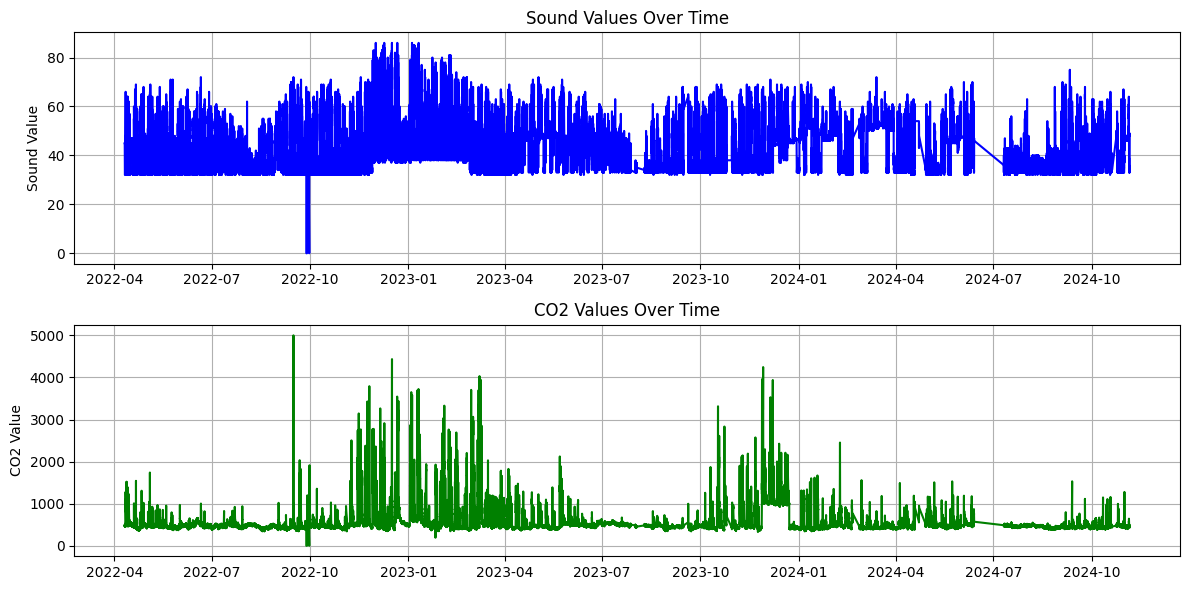

In [3]:
# Load the dataset
file_path = r'S:\OneDrive - Fondation EPF\Uni\5eme Année\Project(Σ.humans)\Coding\sum_humans\Data_Extraction and analysis\Data Extraction\raw_sensor_data.csv'
data = pd.read_csv(file_path)

# Convert 'time' column to datetime format for better plotting
data['time'] = pd.to_datetime(data['time'])

# Step 1: Plot sound_value and co2_value over time
plt.figure(figsize=(12, 6))

# Sound values over time
plt.subplot(2, 1, 1)
plt.plot(data['time'], data['sound_value'], color='b', label='Sound Value')
plt.title('Sound Values Over Time')
plt.ylabel('Sound Value')
plt.grid(True)

# CO2 values over time
plt.subplot(2, 1, 2)
plt.plot(data['time'], data['co2_value'], color='g', label='CO2 Value')
plt.title('CO2 Values Over Time')
plt.ylabel('CO2 Value')
plt.grid(True)

plt.tight_layout()
plt.show()




Small Data set analysis: 
After #2024-06-12 22:32:34, no more data was collected for this month.(May be servers were sut down)

From 2022/09/27 to 2022/09/28, all the values for the sensors, read 0. This can be an error as co2 cannot usually be 0, rather than having jsut a low value.




In [4]:
## Data Cleaning

# Remove rows where both sound_value and co2_value are 0
cleaned_data = data[(data['sound_value'] != 0) | (data['co2_value'] != 0)]

# Check if the cleaning was successful
print(cleaned_data.head())

# Optionally, save the cleaned data to a new CSV file
cleaned_data.to_csv('cleaned_sensor_data.csv', index=False)


                 time  sound_value  co2_value
0 2024-11-05 09:41:08         48.0      451.0
1 2024-11-05 09:30:53         47.0      475.0
2 2024-11-05 09:20:38         48.0      452.0
3 2024-11-05 09:10:23         48.0      463.0
4 2024-11-05 09:00:08         47.0      451.0


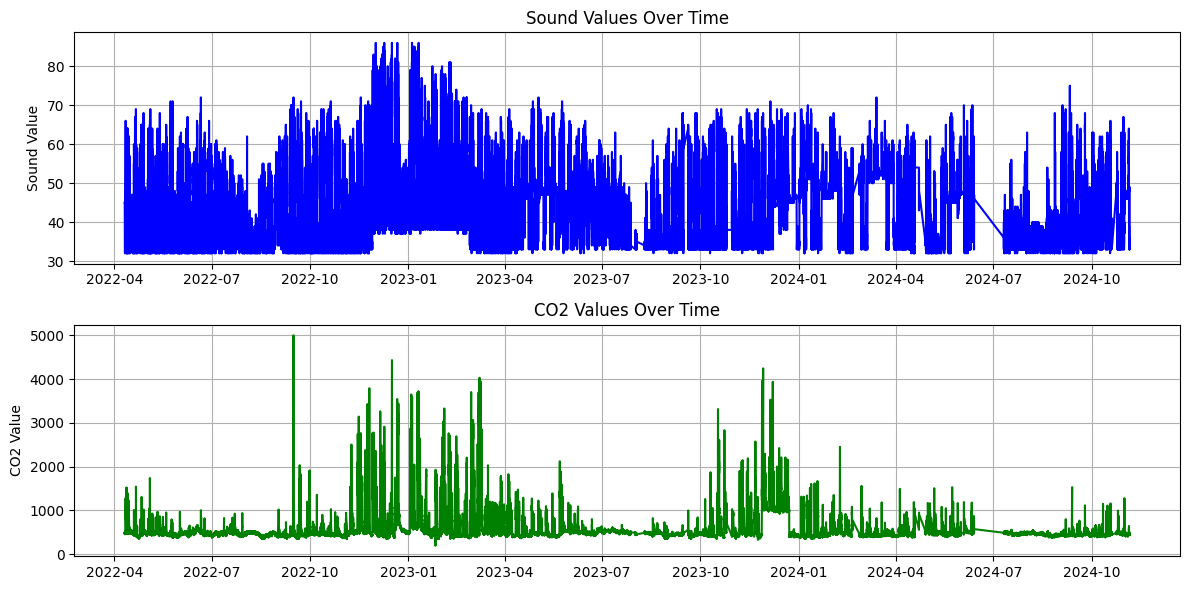

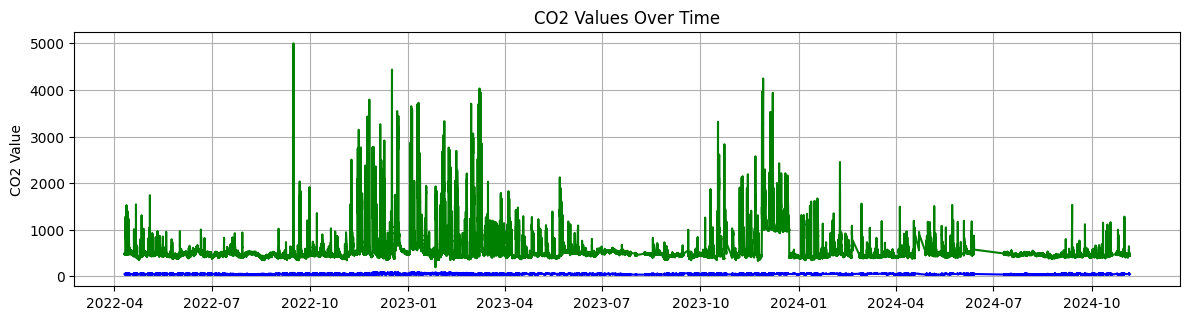

In [5]:

# Load the dataset
file_path = 'cleaned_sensor_data.csv'
data = pd.read_csv(file_path)

# Convert 'time' column to datetime format for better plotting
data['time'] = pd.to_datetime(data['time'])

# Step 1: Plot sound_value and co2_value over time
plt.figure(figsize=(12, 6))

# Sound values over time
plt.subplot(2, 1, 1)
plt.plot(data['time'], data['sound_value'], color='b', label='Sound Value')
plt.title('Sound Values Over Time')
plt.ylabel('Sound Value')
plt.grid(True)

# CO2 values over time
plt.subplot(2, 1, 2)
plt.plot(data['time'], data['co2_value'], color='g', label='CO2 Value')
plt.title('CO2 Values Over Time')
plt.ylabel('CO2 Value')
plt.grid(True)

plt.tight_layout()
plt.show()


# Step 2: Plot sound_value and co2_value over time in one graph
plt.figure(figsize=(12, 6))

# Sound values over time
plt.subplot(2, 1, 1)
plt.plot(data['time'], data['sound_value'], color='b', label='Sound Value')
plt.title('Sound Values Over Time')
plt.ylabel('Sound Value')
plt.grid(True)
#CO2 values
plt.plot(data['time'], data['co2_value'], color='g', label='CO2 Value')
plt.title('CO2 Values Over Time')
plt.ylabel('CO2 Value')
plt.grid(True)

plt.tight_layout()
plt.show()


### Using time series to plot graph with 2 y-axis 

This is a visualization technique where two y-axes are used to represent variables with different ranges on the same time-based x-axis. It's helpful for visual comparisons between two variables that don't share the same scale (like CO₂ and sound levels).

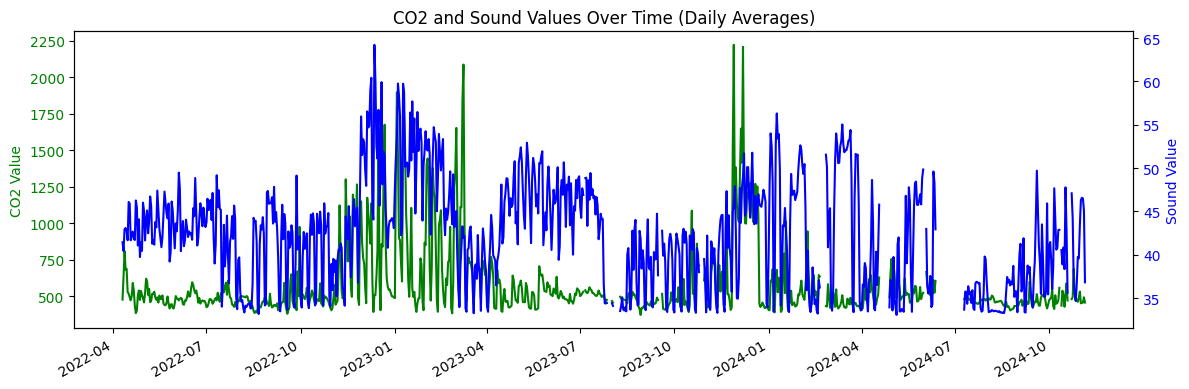

In [6]:


#Step 3
sensor_data = data

# Resample data to daily averages to smooth fluctuations for clearer trends
daily_data = sensor_data.set_index('time').resample('D').mean()

# Create figure and axis objects with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 4))

# Plot CO2 data on the primary y-axis
ax1.plot(daily_data.index, daily_data['co2_value'], color='green', label='CO2 Value')
ax1.set_ylabel('CO2 Value', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create secondary y-axis for sound data
ax2 = ax1.twinx()
ax2.plot(daily_data.index, daily_data['sound_value'], color='blue', label='Sound Value')
ax2.set_ylabel('Sound Value', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Format x-axis for dates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
fig.autofmt_xdate()

# Title and layout adjustments
plt.title('CO2 and Sound Values Over Time (Daily Averages)')
fig.tight_layout()

plt.show()


### Visualizing correlation matrix with original values

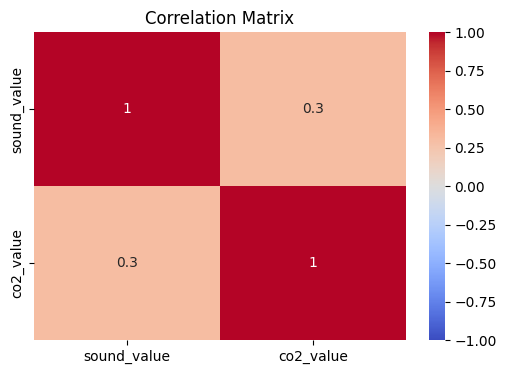

Correlation between sound_value and co2_value: 0.30038883791256965


In [7]:
# Step 4: Visualize correlation matrix using heatmap
plt.figure(figsize=(6, 4))
correlation_matrix = data[['sound_value', 'co2_value']].corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Step 5: Calculate the correlation between 'sound_value' and 'co2_value'
correlation = data['sound_value'].corr(data['co2_value'])
print(f"Correlation between sound_value and co2_value: {correlation}")

The correlation coefficient between sound_value and co2_value is approximately 0.302. Correlation coefficients range from -1 to 1, and here's how to interpret this specific value:

Magnitude (0.302):

1. The value is close to 0, indicating a weak positive correlation. This means that as sound_value increases, co2_value tends to increase slightly, but the relationship is not very strong. The increase in one variable doesn't lead to a very consistent or predictable increase in the other.
Direction (Positive):

2. Since the value is positive, the relationship between the two variables is in the same direction. In this case, higher sound levels tend to be associated with higher CO₂ levels, albeit weakly. Conversely, lower sound values are loosely related to lower CO₂ levels.

# Shifting Co2 values to see the best shift interval between 10, 20 and 30 mins

In [8]:
# Load the dataset
data = pd.read_csv("cleaned_sensor_data.csv")

# Convert the 'time' column to datetime format for easier handling
data['time'] = pd.to_datetime(data['time'])

# Define shift intervals in minutes
shift_intervals = [10, 20, 30]

# Calculate the time difference in terms of the row frequency in the dataset
# (assuming regular intervals, we can shift by a fixed number of rows that roughly matches the desired minute interval)
time_interval = (data['time'][0] - data['time'][1]).seconds // 60  # Approximate interval in minutes between rows
row_shifts = [interval // time_interval for interval in shift_intervals]  # Number of rows to shift for each interval

# Create the shifted CSV files
for interval, row_shift in zip(shift_intervals, row_shifts):
    # Shift the CO₂ column upward by the calculated row shift
    shifted_data = data.copy()
    shifted_data['co2_value'] = data['co2_value'].shift(-row_shift)  # Negative shift to move values up

    # Drop rows with NaN values generated from the shift
    shifted_data = shifted_data.dropna(subset=['co2_value']).reset_index(drop=True)

    # Save the shifted data to a new CSV file
    shifted_data.to_csv(f"shifted_co2_{interval}_mins.csv", index=False)

print("Shifted CSV files created for 10, 20, and 30 minutes.")


Shifted CSV files created for 10, 20, and 30 minutes.


## Plotting graphs

### 10 min shift interval

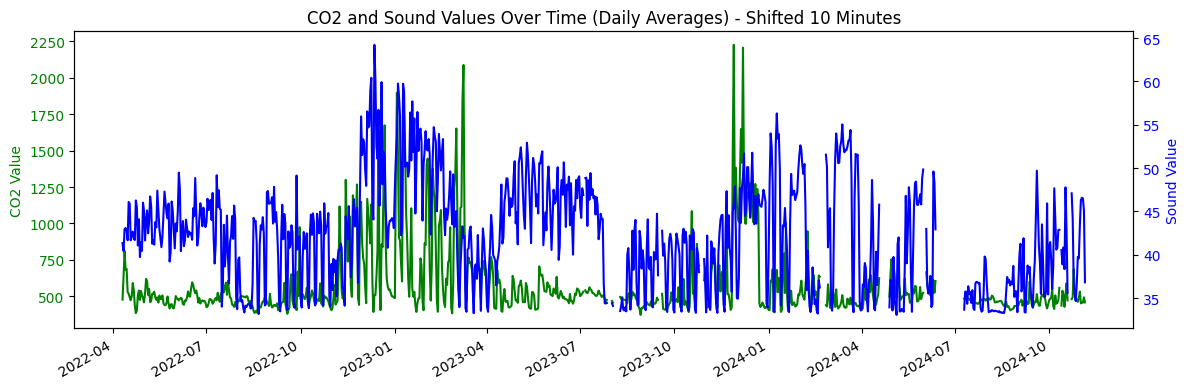

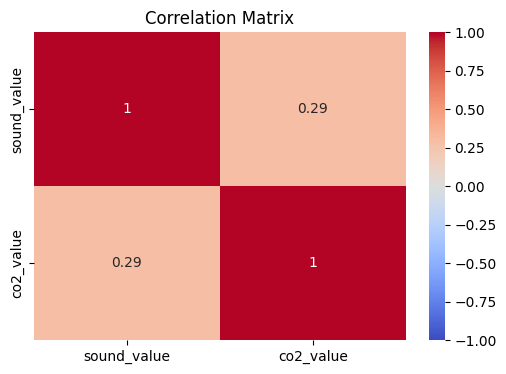

Correlation between sound_value and co2_value: 0.30038883791256965


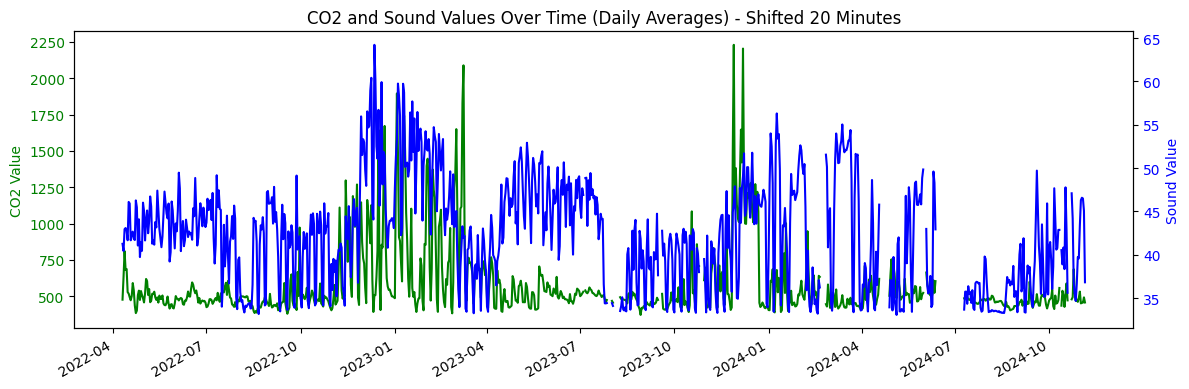

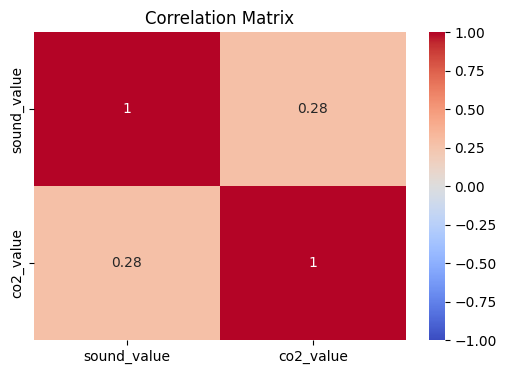

Correlation between sound_value and co2_value: 0.30038883791256965


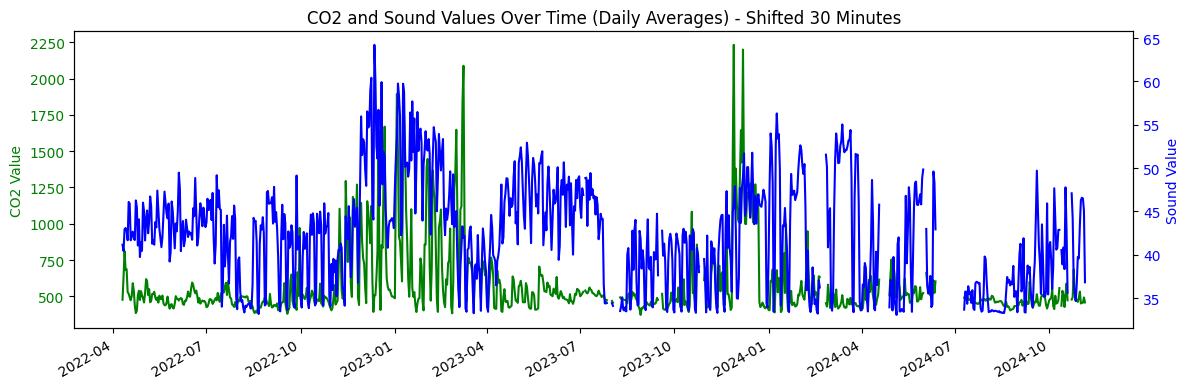

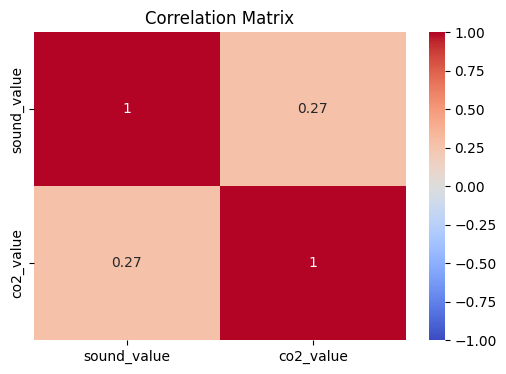

Correlation between sound_value and co2_value: 0.30038883791256965


In [9]:
# List of CSV files for shifted data
csv_files = ["shifted_co2_10_mins.csv", "shifted_co2_20_mins.csv", "shifted_co2_30_mins.csv"]

for file in csv_files:
    # Load the dataset
    sensor_data = pd.read_csv(file)
    
    # Ensure the 'time' column is in datetime format
    sensor_data['time'] = pd.to_datetime(sensor_data['time'])
    
    # Set the 'time' column as the index for resampling
    daily_data = sensor_data.set_index('time').resample('D').mean()

    # Create figure and axis objects with two y-axes
    fig, ax1 = plt.subplots(figsize=(12, 4))

    # Plot CO2 data on the primary y-axis
    ax1.plot(daily_data.index, daily_data['co2_value'], color='green', label='CO2 Value')
    ax1.set_ylabel('CO2 Value', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    # Create secondary y-axis for sound data
    ax2 = ax1.twinx()
    ax2.plot(daily_data.index, daily_data['sound_value'], color='blue', label='Sound Value')
    ax2.set_ylabel('Sound Value', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Format x-axis for dates
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    fig.autofmt_xdate()

    # Title and layout adjustments
    plt.title(f'CO2 and Sound Values Over Time (Daily Averages) - Shifted {file.split("_")[-2]} Minutes')
    fig.tight_layout()

    # Show the plot
    plt.show()

    plt.figure(figsize=(6, 4))
    correlation_matrix = sensor_data[['sound_value', 'co2_value']].corr()


    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()

    # Step 5: Calculate the correlation between 'sound_value' and 'co2_value'
    correlation = data['sound_value'].corr(data['co2_value'])
    print(f"Correlation between sound_value and co2_value: {correlation}")
